In [1]:
%matplotlib inline
!pip install contextily
!pip install geopandas
import pandas as pd
import geopandas
import contextily as ctx
from shapely.geometry import Point
import xyzservices.providers as xyz

     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 15.4 MB 41.9 MB/s 
     |████████████████████████████████| 6.3 MB 40.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
com=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Com01012021_g')
pro=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/ProvCM01012021_g')
reg=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Reg01012021_g')
autostrade=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Autostrade_10000_CT10_line.zip')

1. Visualizarte su una mappa le autostrade,colorandole in modm diverso a seconda della loro lunghezza.Usare la scala dei colori del rosso.(..)

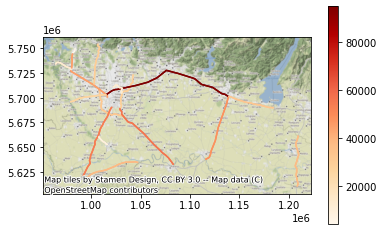

In [4]:
autostrade['lunghezza'] = autostrade.length 
ax = autostrade.to_crs(epsg=3857).plot(column='lunghezza',legend=True,cmap='OrRd')
ctx.add_basemap(ax)

2. Visualizzare in grigio su una mappa le autostrade che sono più lunghe di un certo valore inserito dall'utente. Controllare che l'utente inserisca valori positivi: dare un messaggio opportuno in caso negativo. La distanza deve essere inserita usando i km come unità di misura (3 pt.)

Inserire lunghezza autostrada: 43567


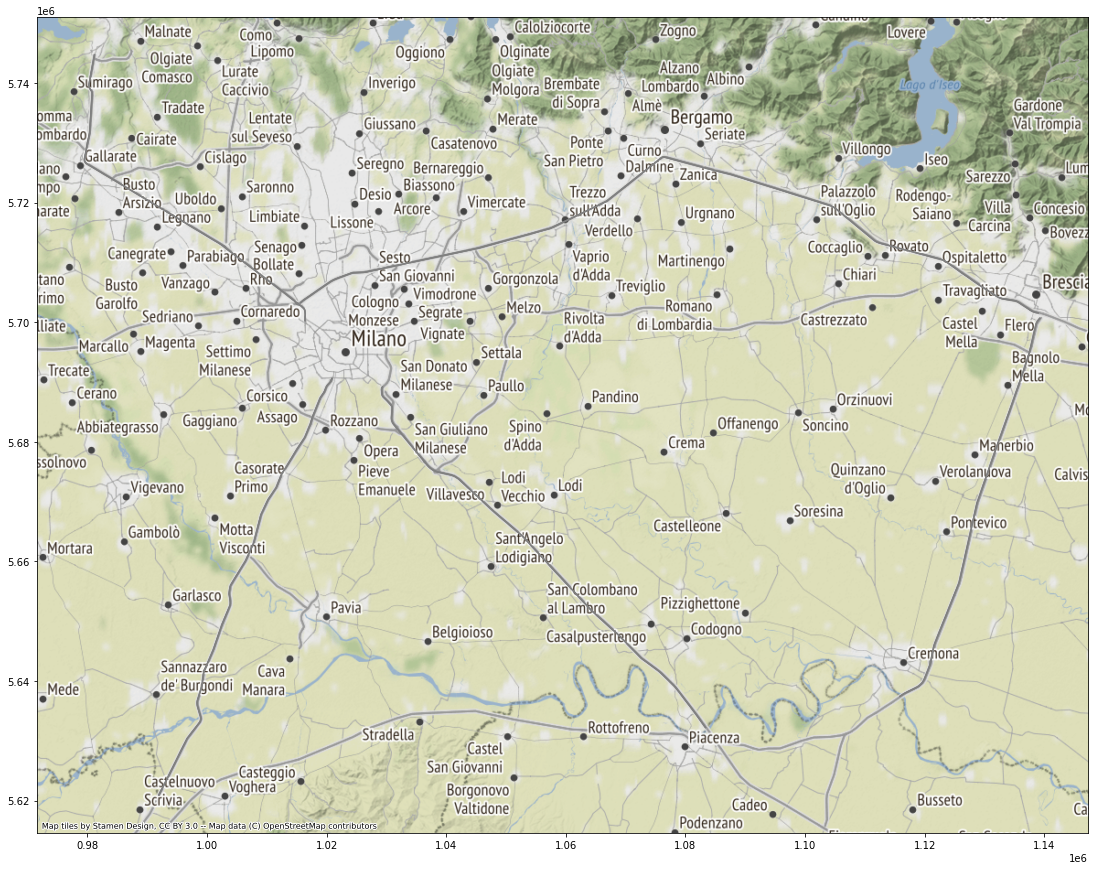

In [5]:
user = float(input('Inserire lunghezza autostrada: '))
if user < 0:
  print('Lunghezza errata')
else:
  autostrada = autostrade[autostrade.lunghezza > user]
  ax = autostrada.to_crs(epsg=3857).plot(figsize=(20,15),color = 'grey')
  ctx.add_basemap(ax)

3. Visualizzare su una mappa i corsi d'acqua che non sono attraversati da autostrade (2 pt.)

In [7]:
corsi = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Corsi_acqua_Piano_di_Gestione.zip')

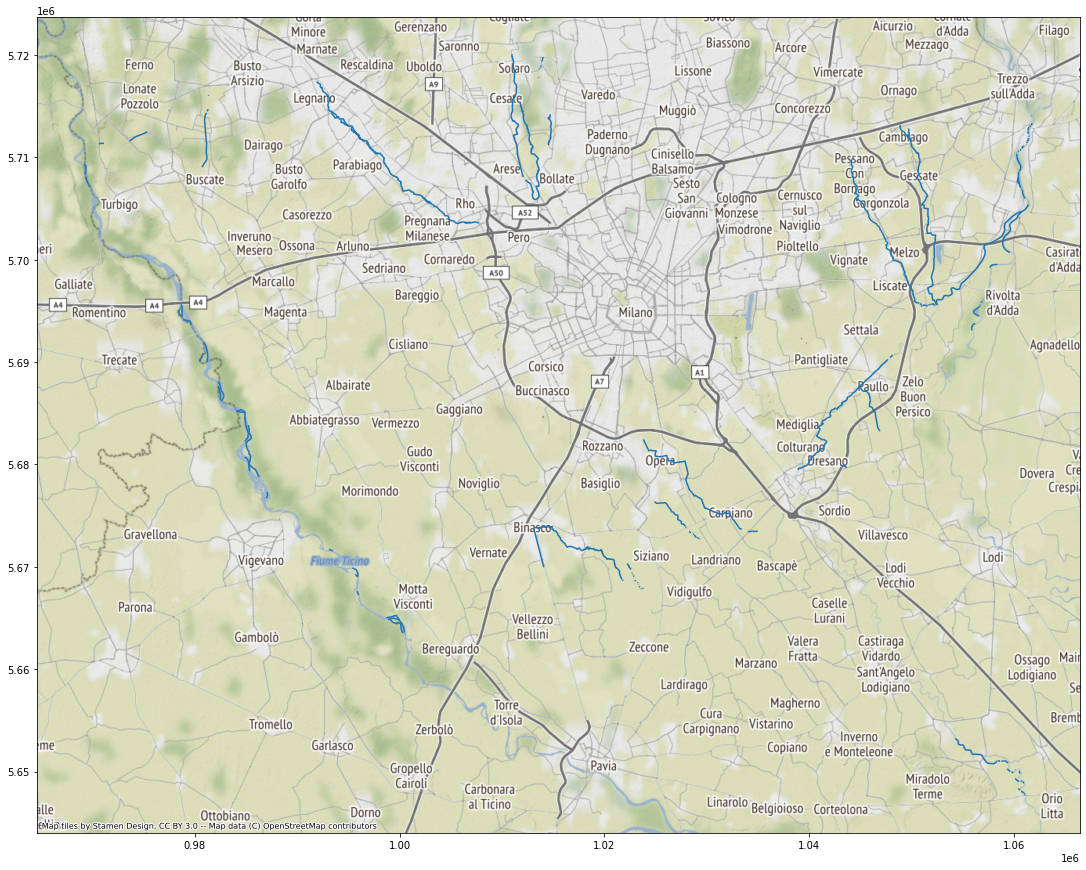

In [8]:
corsi_f = corsi[corsi.intersects(autostrade.unary_union)==False]
ax = corsi_f.to_crs(epsg=3857).plot(figsize=(20,15))
ctx.add_basemap(ax)

4. Visualizzare su una mappa i comuni limitrofi di un comune inserito dall'utente. Il comune inserito deve essere colorato di blu e quelli limitrofi devono essere colorati di giallo (2 pt.)

Inserire comune: Milano


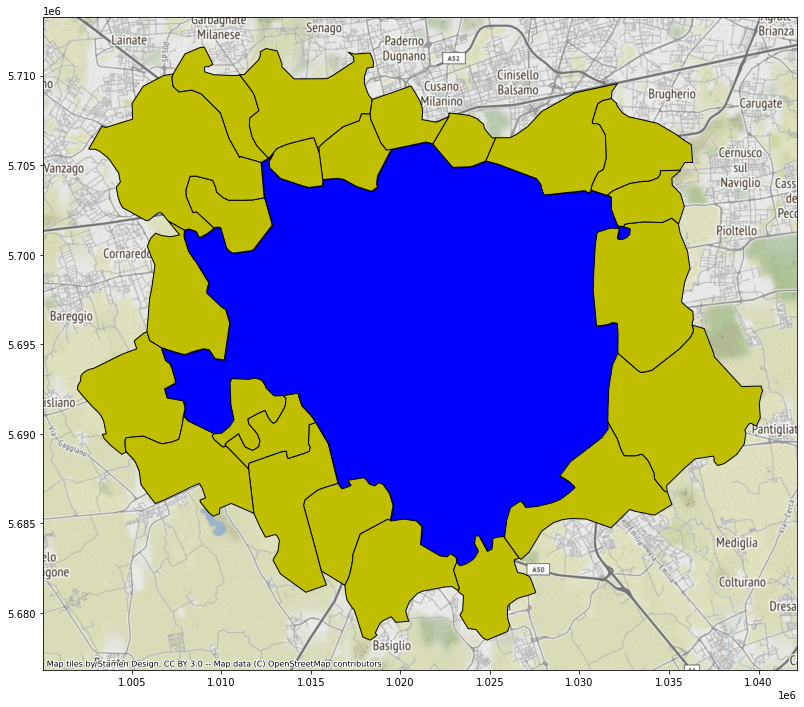

In [9]:
user = input('Inserire comune: ')
lst = list(com['COMUNE'])
if user not in lst:
  print('Comune inesistente')
else:
  comu = com[com['COMUNE'] == user].geometry.squeeze()
  comu2 = com[com['COMUNE'] == user]
  ax = com[com.touches(comu)].to_crs(epsg=3857).plot(edgecolor='k',facecolor='y',figsize=(20,12))
  comu2.to_crs(epsg=3857).plot(ax=ax,edgecolor='k', facecolor='b')
  ctx.add_basemap(ax)